In [20]:
# For answers of some questions, I wrote them at the bottom of corresponding cells.

# Exercise 2.1
#(a)
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

q2data = open('q2_dataset.txt')
Lines = q2data.readlines()
all_authors = []
pubven = []
pubs = 0
refs = []
pub_year = []
for line in Lines:
    if '#index' in line[0:6]:
        pubs += 1
    if '#c' in line:
        line = line[3:len(line)-1]
        pubven.append(line)
    if '#@' in line[0:2]:
        line = line[3:len(line)-1]                
        authors = line.split(';')
        for element in authors:
            all_authors.append(element)
    if '#%' in line[0:2]:
        line = line[3:len(line)-1]
        refs.append(line)        
    if '#t' in line[0:2]:
        line = line[3:len(line)-1]
        pub_year.append(line)
    else:
        continue

dis_authors = set(all_authors) 
dis_pubven = set(pubven)
dis_refs = set(refs)
dis_pub_year = set(pub_year)
print("The number of distinct authors is", len(dis_authors))
print("The number of distinct publication venues is", len(dis_pubven))
print("The number of publications is", pubs)
print("The number of distinct references is", len(dis_refs))
print("The number of distinct publication years is", len(dis_pub_year))



#(b)
# I don't think these numbers are likely to be accurate.
# Here are all the publications venue names associated with the conference 
#“Principles and Practice of Knowledge Discovery in Databases”
pubven2 = []
for line in Lines:
    if '#c' in line:
        line = line[3:len(line)-1]
        if 'Principles and Practice of Knowledge Discovery in Databases' in line:
            pubven2.append(line)
    else:
        continue
print(set(pubven2))


#(c)
# The additional problem is that some authors may have the same name but actually they are different person.        
        



The number of distinct authors is 1484999
The number of distinct publication venues is 255686
The number of publications is 1976815
The number of distinct references is 871089
The number of distinct publication years is 70
{'PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases', "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases", 'Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)', 'Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)', "PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases"}


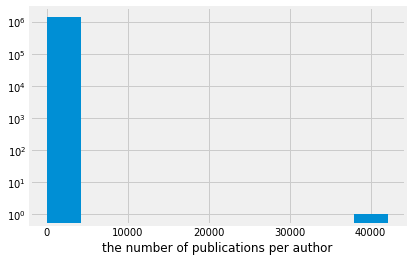

In [8]:
# Exercise 2.2
#(a)
from collections import Counter
pub_per_author = Counter(all_authors).values()
plt.hist(pub_per_author)
plt.yscale('log')
plt.xlabel('the number of publications per author')
plt.show()

# The bar corresponding to x=40000 represents for missing author value.

In [9]:
#(b)
pub_per_author2 = [v for v in pub_per_author]
print("The mean of publications per author is", np.mean(pub_per_author2))
print("The standard deviation of publications per author is", np.std(pub_per_author2))
print("The Q1 of publications per author is", np.percentile(pub_per_author2,25))
print("The Q2 of publications per author is", np.percentile(pub_per_author2,50))
print("The Q3 of publications per author is", np.percentile(pub_per_author2,75))

# The mean is around 3.3 and the median is 1.0. 

The mean of publications per author is 3.3062971759576945
The standard deviation of publications per author is 35.713183513512604
The Q1 of publications per author is 1.0
The Q2 of publications per author is 1.0
The Q3 of publications per author is 2.0


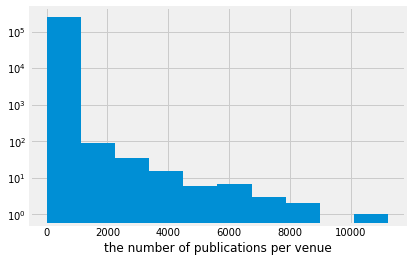

In [10]:
#(c)
pub_per_ven = Counter(pubven).values()
plt.hist(pub_per_ven)
plt.yscale('log')
plt.xlabel('the number of publications per venue')
plt.show()


In [11]:
pub_per_ven2 = [v for v in pub_per_ven]
print("The mean of publications per venue is", np.mean(pub_per_ven2))
print("The standard deviation of publications per venue is", np.std(pub_per_ven2))
print("The Q1 of publications per venue is", np.percentile(pub_per_ven2,25))
print("The Q2 of publications per venue is", np.percentile(pub_per_ven2,50))
print("The Q3 of publications per venue is", np.percentile(pub_per_ven2,75))

largest_ven = max(pub_per_ven2)
ven_name = []
keys = Counter(pubven).keys()
Dict = Counter(pubven)
for element in keys:
    if Dict.get(element) == largest_ven:
        ven_name.append(element)
    else:
        continue
print("The venue with the largest number of publications is:")
print(ven_name)

The mean of publications per venue is 7.731416659496413
The standard deviation of publications per venue is 83.38105610357532
The Q1 of publications per venue is 1.0
The Q2 of publications per venue is 1.0
The Q3 of publications per venue is 1.0
The venue with the largest number of publications is:
['IEEE Transactions on Information Theory']


In [12]:
# Exercise 2.3
#(a)
# Create a list called all_pubs: each of its elements is also a list, containing all information of a publication.

all_pubs = []
single_pub = []
references = []
q2data = open('q2_dataset.txt')
Lines = q2data.readlines()

for line in Lines:
    line = line[0:len(line)-1]
        
    if '#index' in line:
        index = line[7:]
    if '#*' in line:
        title = line[3:]
    if '#@' in line:
        authors = line[3:].split(';')
    if line[0:2] == '#t':
        year = line[3:]
    if '#c' in line:
        pubven = line[3:]
    if '#%' in line:
        references.append(line[3:])
    if len(line) == 0:
        single_pub.append(index)
        single_pub.append(title)
        single_pub.append(authors)
        single_pub.append(year)
        single_pub.append(pubven)
        single_pub.append(references)
        all_pubs.append(single_pub)
        references=[]
        single_pub=[]
all_pubs

[['1',
  'Book Review: Discover Linux',
  ['Marjorie Richardson'],
  '1998',
  'Linux Journal',
  []],
 ['2',
  'MOSFET table look-up models for circuit simulation',
  [''],
  '1984',
  'Integration, the VLSI Journal',
  []],
 ['3',
  'The verification of the protection mechanisms of high-level language machines',
  ['Virgil D. Gligor'],
  '1984',
  'International Journal of Parallel Programming',
  []],
 ['4',
  'Another view of functional and multivalued dependencies in the relational database model',
  ['M. Gyssens', 'J. Paredaens'],
  '1984',
  'International Journal of Parallel Programming',
  []],
 ['5',
  'Entity-relationship diagrams which are in BCNF',
  ['Sushil Jajodia', 'Peter A. Ng', 'Frederick N. Springsteel'],
  '1984',
  'International Journal of Parallel Programming',
  []],
 ['6',
  'The computer comes of age',
  ['Rene Moreau'],
  '1984',
  'The computer comes of age',
  []],
 ['7',
  'Computationally efficient algorithms for a one-time pad scheme',
  ['A. G. Akritas

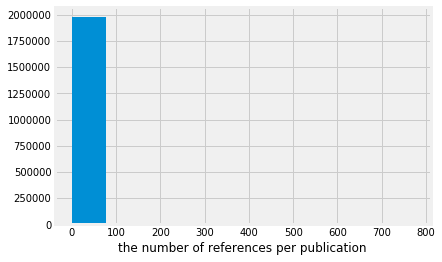

In [13]:
# plot histogram of the number of references per publication
ref_per_pub=[]
for pub in all_pubs:
    ref_per_pub.append(len(pub[5]))
plt.hist(ref_per_pub)
plt.xlabel('the number of references per publication')
plt.show()

In [14]:
maxref = max(ref_per_pub)
for pub in all_pubs:
    if len(pub[5]) == maxref:
        print("The publication with the largest number of references is")
        print(pub[0:5])
    else:
        continue
    

The publication with the largest number of references is
['719353', 'Cited References', ['Johannes Grabmeier', 'Erich Kaltofen', 'Volker Weispfenning'], '2003', 'Computer algebra handbook']


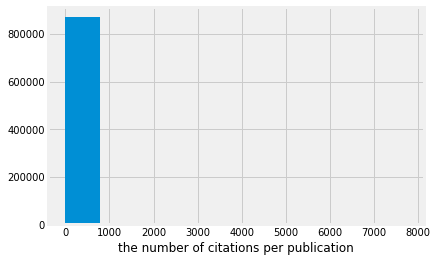

In [15]:
# plot histogram of the number of citations per publication
from collections import Counter
citation = []
for pub in all_pubs:
    for cit in pub[5]:
        citation.append(cit)
cit_per_pub = Counter(citation).values()
plt.hist(cit_per_pub)
plt.xlabel('the number of citations per publication')
plt.show()
                

In [16]:
maxcit = max(cit_per_pub)
paperIndex = Counter(citation).keys()
Dict = Counter(citation)
maxcit_pub = []
for index in paperIndex:
    if Dict.get(index) == maxcit:
        maxcit_pub.append(index)
    else:
        continue
        
print("The publication with the largest number of citations has the following corresponding index:")
print(maxcit_pub)

The publication with the largest number of citations has the following corresponding index:
['408396']


In [17]:
# (b)

Dict = Counter(citation)
for pub in all_pubs:
    index = pub[0]
    citnum = Dict.get(index)
    if type(citnum) is int:
        pub.append(citnum)
    else:
        pub.append(0)

all_pubs

[['1',
  'Book Review: Discover Linux',
  ['Marjorie Richardson'],
  '1998',
  'Linux Journal',
  [],
  0],
 ['2',
  'MOSFET table look-up models for circuit simulation',
  [''],
  '1984',
  'Integration, the VLSI Journal',
  [],
  0],
 ['3',
  'The verification of the protection mechanisms of high-level language machines',
  ['Virgil D. Gligor'],
  '1984',
  'International Journal of Parallel Programming',
  [],
  0],
 ['4',
  'Another view of functional and multivalued dependencies in the relational database model',
  ['M. Gyssens', 'J. Paredaens'],
  '1984',
  'International Journal of Parallel Programming',
  [],
  1],
 ['5',
  'Entity-relationship diagrams which are in BCNF',
  ['Sushil Jajodia', 'Peter A. Ng', 'Frederick N. Springsteel'],
  '1984',
  'International Journal of Parallel Programming',
  [],
  4],
 ['6',
  'The computer comes of age',
  ['Rene Moreau'],
  '1984',
  'The computer comes of age',
  [],
  8],
 ['7',
  'Computationally efficient algorithms for a one-time 

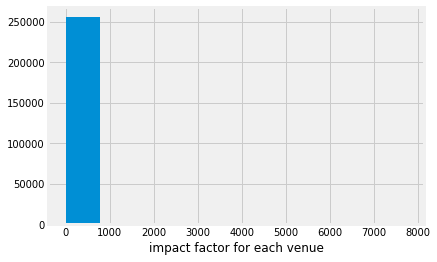

In [21]:
Dict = Counter(pubven)
D = {}
for ven in Dict.keys():
    D[ven] = 0

for pub in all_pubs:
    venue = pub[4]
    if type(D.get(venue)) is int:
        D[venue] = D.get(venue) + pub[6]
    else:
        continue

for ven in Dict.keys():
    D[ven] = D.get(ven) / Dict.get(ven)

impact_factor = D.values()
plt.hist(impact_factor)
plt.xlabel('impact factor for each venue')
plt.show()

In [22]:
# (c)

highest_factor = max(impact_factor)
for ven in Dict.keys():
    if D.get(ven) == highest_factor:
        print("The venue with the highest apparent impact factor is", ven)
    else:
        continue
print("The highest apparent impact factor is", highest_factor)

# I believe this number.

The venue with the highest apparent impact factor is Computers and Intractability: A Guide to the Theory of NP-Completeness
The highest apparent impact factor is 7753.0


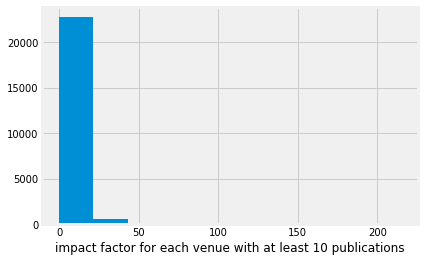

In [23]:
# (d)

Dict = Counter(pubven)
D2 = {}
for ven in Dict.keys():
    if Dict.get(ven) >= 10:
        D2[ven] = 0
    else:
        continue

for pub in all_pubs:
    venue = pub[4]
    if venue in D2.keys() and type(D2.get(venue)) is int:
        D2[venue] = D2.get(venue) + pub[6]
    else:
        continue

for ven in D2.keys():
    D2[ven] = D2.get(ven) / Dict.get(ven)

impact_factor2 = D2.values()
plt.hist(impact_factor2)
plt.xlabel('impact factor for each venue with at least 10 publications')
plt.show()

# We can find that the max y-value becomes much smaller in this histogram, and there are more bars shown in the plot.

In [24]:
highest_factor2 = max(impact_factor2)
highest_ven = []
for ven in D2.keys():
    if D2.get(ven) == highest_factor2:
        highest_ven.append(ven)
print("The venue with the highest impact factor is",highest_ven)

The venue with the highest impact factor is ['Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications']


In [25]:
cit_list = []
for pub in all_pubs:
    venue = pub[4]
    if venue == highest_ven[0]:
        cit_list.append(pub[6])
    else:
        continue

mean_cit = np.mean(cit_list)        
median_cit = np.percentile(cit_list, 50)
print("the impact factor (mean number of citations) is", mean_cit)
print("the median number of citations is", median_cit)

# We can see that the impact factor is greater than median number of citations.

the impact factor (mean number of citations) is 214.82608695652175
the median number of citations is 46.0


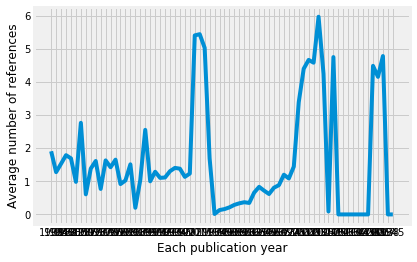

In [30]:
# (e)

D3 = {}
Dict2 = Counter(pub_year)
for year in Dict2.keys():
    D3[year] = []

for pub in all_pubs:
    pubyear = pub[3]
    D3.get(pubyear).append(len(pub[5]))

avg_ref_year = []
for year in D3.keys():
    avg = np.mean(D3.get(year))
    avg_ref_year.append(avg)

eachyear = [v for v in D3.keys()]
plt.plot(eachyear, avg_ref_year, linestyle = 'solid')
plt.xlabel("Each publication year")
plt.ylabel("Average number of references")
plt.show()

# We can see that there is big fluctuation for average number of references in each publication year.

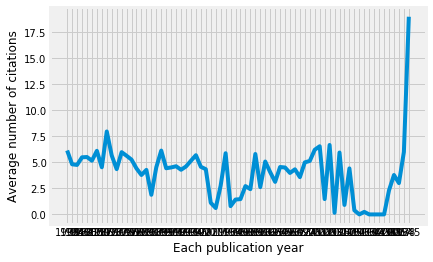

In [31]:
D4 = {}
Dict2 = Counter(pub_year)
for year in Dict2.keys():
    D4[year] = []

for pub in all_pubs:
    pubyear = pub[3]
    D4.get(pubyear).append(pub[6])

avg_cit_year = []
for year in D4.keys():
    avg = np.mean(D4.get(year))
    avg_cit_year.append(avg)

eachyear = [v for v in D4.keys()]
plt.plot(eachyear, avg_cit_year, linestyle = 'solid')
plt.xlabel("Each publication year")
plt.ylabel("Average number of citations")
plt.show()

# Compared to that in previous plot, the trend of average number of citations in each publication year
# is overall increasing. 

In [74]:
# Exercise 4.1

q4data = open('q4_dataset.txt')
Lines = q4data.readlines()
all_authors = []
pubven = []
pubs = 0
refs = []
pub_year = []
for line in Lines:
    if '#index' in line[0:6]:
        pubs += 1
    if '#c' in line[0:2]:
        line = line[2:len(line)-1]
        pubven.append(line)
    if '#@' in line[0:2]:
        line = line[2:len(line)-1]                
        authors = line.split(',')
        for element in authors:
            all_authors.append(element)
    if '#%' in line[0:2]:
        line = line[2:len(line)-1]
        refs.append(line)        
    if '#t' in line[0:2]:
        line = line[2:len(line)-1]
        pub_year.append(line)
    else:
        continue

dis_authors = set(all_authors) 
dis_pubven = set(pubven)
dis_refs = set(refs)
dis_pub_year = set(pub_year)
print("The number of distinct authors is", len(dis_authors))
print("The number of distinct publication venues is", len(dis_pubven))
print("The number of publications is", pubs)
print("The number of distinct references is", len(dis_refs))
print("The number of distinct publication years is", len(dis_pub_year))

# Compared to the q2_dataset, q4_dataset has fewer distinct authors, fewer distinct publication venues, 
# more publications, fewer distinct references and more distinct publication years.

The number of distinct authors is 1232541
The number of distinct publication venues is 8708
The number of publications is 2146341
The number of distinct references is 528264
The number of distinct publication years is 80


In [1]:
# Create a list called all_pubs2: each of its elements is also a list, containing all information of a publication.

all_pubs2 = []
single_pub = []
references = []
q4data = open('q4_dataset.txt')
Lines = q4data.readlines()

for line in Lines:
    line = line[0:len(line)-1]
        
    if '#index' in line:
        index = line[6:]
    if '#*' in line:
        title = line[2:]
    if '#@' in line:
        authors = line[2:].split(',')
    if line[0:2] == '#t':
        year = line[2:]
    if '#c' in line:
        pubven = line[2:]
    if '#%' in line:
        references.append(line[2:])
    if '#!' in line:
        continue
    if line[0:2] == '  ':
        single_pub.append(title)
        single_pub.append(authors)
        single_pub.append(year)
        single_pub.append(pubven)
        single_pub.append(index)
        single_pub.append(references)
        all_pubs2.append(single_pub)
        references=[]
        single_pub=[]
all_pubs2


[['OQL[C++]: Extending C++ with an Object Query Capability.',
  ['José A. Blakeley'],
  '1995',
  'Modern Database Systems',
  '2',
  [' ']],
 ['Transaction Management in Multidatabase Systems.',
  ['Yuri Breitbart', 'Hector Garcia-Molina', 'Abraham Silberschatz'],
  '1995',
  'Modern Database Systems',
  '3',
  [' ']],
 ['Overview of the ADDS System.',
  ['Yuri Breitbart', 'Tom C. Reyes'],
  '1995',
  'Modern Database Systems',
  '4',
  [' ']],
 ['Multimedia Information Systems: Issues and Approaches.',
  ['Stavros Christodoulakis', 'Leonidas Koveos'],
  '1995',
  'Modern Database Systems',
  '5',
  [' ']],
 ['Active Database Systems.',
  ['Umeshwar Dayal', 'Eric N. Hanson', 'Jennifer Widom'],
  '1995',
  'Modern Database Systems',
  '6',
  [' ']],
 ['Where Object-Oriented DBMSs Should Do Better: A Critique Based on Early Experiences.',
  ['Angelika Kotz Dittrich', 'Klaus R. Dittrich'],
  '1995',
  'Modern Database Systems',
  '7',
  [' ']],
 ['Distributed Databases.',
  ['Hector Garc

In [2]:
# Exercise 4.2
# (a)

import pyspark 
from pyspark.mllib.fpm import FPGrowth
from pyspark import SparkContext
import re

authorInfo = []
for pub in all_pubs2:
    authorInfo.append(list(set(pub[1])))
    
#Exclude empty set
authorInfo = [v for v in authorInfo if v != []]

SparkContext.setSystemProperty('spark.executor.memory','4g')
sc = pyspark.SparkContext('local[*]')

In [3]:
rdd = sc.parallelize(authorInfo, 2)
support = 1e-4
training = FPGrowth.train(rdd, support, 2)
sorted(training.freqItemsets().collect())

# Here is the result when support threshold = 1e-4

[FreqItemset(items=[''], freq=16989),
 FreqItemset(items=['Abhijit Chatterjee'], freq=270),
 FreqItemset(items=['Aggelos K. Katsaggelos'], freq=301),
 FreqItemset(items=['Ajith Abraham'], freq=554),
 FreqItemset(items=['Alan F. Smeaton'], freq=256),
 FreqItemset(items=['Alan M. Frieze'], freq=290),
 FreqItemset(items=['Albert Y. Zomaya'], freq=309),
 FreqItemset(items=['Alberto Del Bimbo'], freq=311),
 FreqItemset(items=['Alberto L. Sangiovanni-Vincentelli'], freq=481),
 FreqItemset(items=['Albrecht Schmidt'], freq=215),
 FreqItemset(items=['Alex Pentland'], freq=261),
 FreqItemset(items=['Alok N. Choudhary'], freq=333),
 FreqItemset(items=['Amir Pnueli'], freq=262),
 FreqItemset(items=['Amit P. Sheth'], freq=280),
 FreqItemset(items=['Amr El Abbadi'], freq=285),
 FreqItemset(items=['Amr El Abbadi', 'Divyakant Agrawal'], freq=242),
 FreqItemset(items=['Andrew B. Kahng'], freq=324),
 FreqItemset(items=['Andrew Zisserman'], freq=263),
 FreqItemset(items=['Andrzej Cichocki'], freq=234),
 

In [3]:
rdd = sc.parallelize(authorInfo, 2)
support2 = 1e-5
training2 = FPGrowth.train(rdd, support2, 2)
coauthor2 = sorted(training2.freqItemsets().collect())
coauthor2

# Here is the result when support threshold = 1e-5

[FreqItemset(items=[''], freq=16989),
 FreqItemset(items=['A Min Tjoa'], freq=41),
 FreqItemset(items=['A. Agung Julius'], freq=25),
 FreqItemset(items=['A. Ant Ozok'], freq=26),
 FreqItemset(items=['A. Ardeshir Goshtasby'], freq=32),
 FreqItemset(items=['A. Aydin Alatan'], freq=71),
 FreqItemset(items=['A. Ben Hamza'], freq=50),
 FreqItemset(items=['A. Benjamin Premkumar'], freq=45),
 FreqItemset(items=['A. Benjamin Premkumar', 'A. S. Madhukumar'], freq=29),
 FreqItemset(items=['A. C. Cem Say'], freq=45),
 FreqItemset(items=['A. Chatterjee'], freq=22),
 FreqItemset(items=['A. David Edwards'], freq=29),
 FreqItemset(items=['A. David Edwards', 'Daniel Rueckert'], freq=25),
 FreqItemset(items=['A. David Marshall'], freq=48),
 FreqItemset(items=['A. E. Eiben'], freq=95),
 FreqItemset(items=['A. Enis Çetin'], freq=82),
 FreqItemset(items=['A. Frank van der Stappen'], freq=74),
 FreqItemset(items=['A. Frank van der Stappen', 'Mark H. Overmars'], freq=35),
 FreqItemset(items=['A. G. Ramakris

In [3]:
# Unfortunately, when I tried to regain the result in above cell, I kept receiving this error message.
# I have tried several ways for several times but still can't solve it.

rdd = sc.parallelize(authorInfo, 2)
support2 = 1e-5
training2 = FPGrowth.train(rdd, support2, 2)
coauthor2 = sorted(training2.freqItemsets().collect())
coauthor2

# Here is the result when support threshold = 1e-5

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 63613)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Users/zhang/anaconda3/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/Users/zhang/anaconda3/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Users/zhang/anaconda3/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/accumulators.py", line 235, in handle
    num_updates = read_int(self.rfile)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/serializers.py", line 685, in read_int
    raise EOFError
EOFError
---------------------------

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ConnectionRefusedError: [Errno 61] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <un

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:63599)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d8f243c5196a>", line 4, in <module>
    coauthor2 = sorted(training2.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

Py4JError: An error occurred while calling None.None

In [3]:
rdd = sc.parallelize(authorInfo, 2)
support3 = 0.5e-5
training3 = FPGrowth.train(rdd, support3, 2)
coauthor3 = sorted(training3.freqItemsets().collect())
coauthor3

# When support threshold = 0.5e-5, it kept throwing OutOfMemory Error. But we can infer that 
# the size of coauthor result will become larger when we successively decrease support threshold. And longer processing time.

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 62317)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Users/zhang/anaconda3/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/Users/zhang/anaconda3/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Users/zhang/anaconda3/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/accumulators.py", line 235, in handle
    num_updates = read_int(self.rfile)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/serializers.py", line 685, in read_int
    raise EOFError
EOFError
---------------------------

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62292)
Traceback (most recent call last):
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bf156d537dbf>", line 4, in <module>
    coauthor3 = sorted(training3.freqItemsets().collect())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/pyspark/rdd.py", line 834, in collect
    sock_info = self.ctx._jvm.PythonRDD.collectAndServe(self._jrdd.rdd())
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/zhang/anaconda3/lib/python3.6/site-packages/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <unprintable Py4JJavaError object>

During handling of th

Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:62292)

In [ ]:
# (b) 

# Since I can't get the result for threshold = 0.5e-5, 
# I just keep threshold=1e-5 and here are the code for getting top5 co-authors for these researchers: 
# Rakesh Agrawal, Jiawei Han, Zoubin Ghahramani and Christos Faloutsos according to frequency.

# Hope this will help me gain some points for this problem.

coRA = []
coJH = []
coZG = []
coCF = []
for element in coauthor2:
    if "Rakesh Agrawal" in element[0]:
        coRA.append(element)
    elif "Jiawei Han" in element[0]:
        coJH.append(element)
    elif "Zoubin Ghahramani" in element[0]:
        coZG.append(element)
    elif "Christos Faloutsos" in element[0]:
        coCF.append(element)
    else:
        continue

In [ ]:
def getSecond(element):
    return element[1]

print("The top 5 co-authors for Rakesh Agrawal is", sorted(coRA,key=getSecond,reverse=True)[0:5])
print("The top 5 co-authors for Jiawei Han is", sorted(coJH,key=getSecond,reverse=True)[0:5])
print("The top 5 co-authors for Zoubin Ghahramani is", sorted(coZG,key=getSecond,reverse=True)[0:5])
print("The top 5 co-authors for Christos Faloutsos is", sorted(coCF,key=getSecond,reverse=True)[0:5])

In [ ]:
# Exercise 4.3
# (a)

# Again I encountered the Py4JNetworkError as above. Here I provided the code to analyze academic communities.
# Hope this can help me gain some points.

# Create a dictionary, and represent each author as a basket 
# in which the items are the venues in which the author has at least one publication.

Dict = {}

# The list all_authors is from the part Exercise 4.1. We want to exclude empty element here. 
all_authors = [v for v in all_authors if v != '']
D = Counter(all_authors)
for ele in D.keys():
    Dict[ele] = []

for pub in all_pubs2:
    author = pub[1]
    if author != '':
        Dict.get(author).append(pub[3])
    else:
        continue
        
# Remove the same element in each basket:
for author in Dict.keys():
    Dict[author] = list(set(Dict.get(author)))

# Transform the keys of Dict into a list:
venue_basket = list(Dict.keys())


In [ ]:
# Use FP-Growth to analyze the academic communities:
SparkContext.setSystemProperty('spark.executor.memory','4g')
sc = pyspark.SparkContext('local[*]')

rdd = sc.parallelize(venue_basket, 2)
support = 1e-3
training = FPGrowth.train(rdd, support, 2)
Result = sorted(training.freqItemsets().collect())

# We can infer that the size of result will become larger when we successively decrease support threshold.
# And the processing time will be longer.